# 1. Regression & Gradient Descent
###### (1). 다음 식의 그래프를 python으로 그리시오 (-10<x<10)
    y=4+5X+2X^2

  **Line 1:** 그래프를 그리기 위한 matplotlib 선언

  **Line 3-5:** (1)번 문제에 대한 수식을 다른 문제에서도 사용함으로 X값을 입력하면 수식에 대한 Y값을 반환하는 함수 선언
  
  **Line 7-8:** -10초과 10미만을 만족하는 정수 X값 리스트를 만들고, 해당 X값에 따른 Y값 리스트 생성
  
  **Line 10-13:** 생성된 X와 Y를 그래프로 그리는 코드


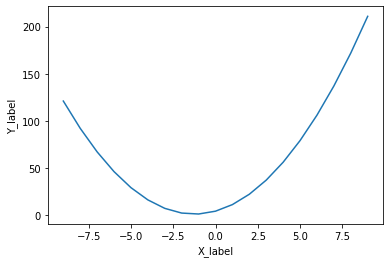

In [ ]:
import matplotlib.pyplot as plt

def function_num1(x):
  result = 4+5*x+2*x**2
  return result

X_label = list(range(-9,10,1))
Y_label = list([function_num1(i) for i in X_label])

plt.plot(X_label, Y_label)
plt.xlabel('X_label')
plt.ylabel('Y_label')
plt.show()

###### (2). 위 식을 다음과 같이  정의하여 parameter(a0, a1, a2)들을 구하고자 한다. 먼저 (1)에서의 식에 random number(정규분포 기반으로 random number을 생성하는 함수 활용, 적정한 분산값 선정)를 활용하여 data set 50쌍을 구하여 이를 python으로 그리시오
    y=a0+a1X+a2X^2

  **Line 1:** numpy 패키지를 사용하기 위해 import

  **Line 3:** 분산 값 생성을 위한 변수 선언

  **Line 5-6:** 1.(1) 수식을 1.(2)의 data set 50쌍과 맞추기 위해서 -25에서 25의 정수 값 범위로 지정하여 X값 리스트와 Y값 리스트를 작성

  **Line 8-10:** 랜덤 값과 Line 3에서 선언한 변수를 더한 랜덤 값 리스트 50개를 구하고 해당 값을 Y 값 리스트에 더해서 분산 값을 생성한다.
  
  **Line 12-16:** 1.(1)의 결과와 1.(2)의 결과를 비교하기 위한 그래프를 그리는 코드


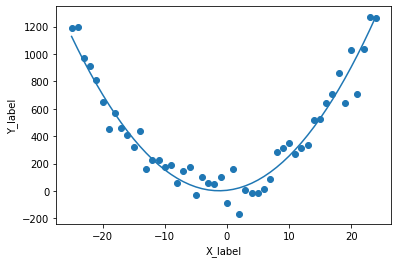

In [ ]:
import numpy as np

mu = 100

X_label = list(range(-25,25,1))
Y_label = list([function_num1(i) for i in X_label])

Dis = np.random.normal(size=50) * mu
X_label_2 = list(range(-25,25,1))
Y_label_2 = list([function_num1(i) for i in X_label_2]) + Dis

plt.plot(X_label, Y_label)
plt.scatter(X_label_2, Y_label_2)
plt.xlabel('X_label')
plt.ylabel('Y_label')
plt.show()

###### (3). least square 방식을 이용하여 위 parameter를 구하시오. (실제 계산은 python을 이용)

  **Line 1:** 1.(2)에서 구한 X값에 대해서 X, X^2 값으로 변형하여 저장하기 위한 리스트 변수 선언

  **Line 3-6:** 1.(2)에서 구한 X값에 대해서 X, X^2 값으로 변형

  **Line 8-11:** 변형한 X값과 1.(2)에서 생성한 Y값에 대해 least square의 a0, a1, a2의 값을 행렬을 통해 구하기 위해 X 리스트를 (50x3) Y 리스트를 (50x1) 행렬로 변환한다. (편의를 위해 a0, a1, a2 변수 값을 x행렬이라 부르고, X 변수 값을 A행렬, Y 변수 값을 B행렬이라 한다.)
least square 방식은 임의의 a0, a1, a2 값에 대해 서로 다른 것이 k+1개가 있다면 |A^T A^|≠0 이므로 A^T A^ x^=A^T B^는 유일한 해 x = a0, a1, a2 값을 가진다. 따라서 A^T 값이 필요하므로

  **Line 13-15:** 따라서 A^T 값이 필요하므로 해당 값을 구해주고 A^T A^ x^=A^T B^의 행렬을 계산하기 위해서 행렬 곱 연산을 수행한다.

  **Line 17-18:** x 행렬을 구하기 위해서는 A^T A^행렬의 역 행렬을 구해 행렬 곱 연산을 수행하면 단위 행렬이 됨으로 각 양변에 〖〖(A〗^T A^ )〗^T를 행렬 곱 해준다.

  **Line 20-25:** 이전 단계에서 행렬 곱한 값 각 순서대로 a0, a1, a2 값이 됨으로 각각의 값을 그래프로 하는 함수를 선언한다.

  **Line 27-34:** least square 방식으로 만들어진 결과를 기존의 값과 비교하기 위해서 그래프를 그린다.

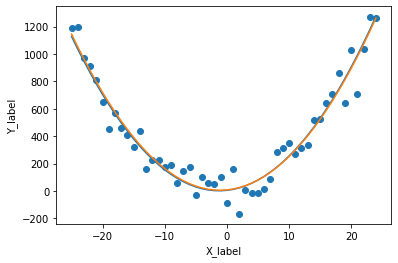

In [ ]:
r_X = []

for i in X_label_2:
  r_X.append(1)
  r_X.append(i)
  r_X.append(i**2) 

A_array = np.array(r_X)
A_array = A_array.reshape(50, 3)
B_array = np.array(Y_label_2)
B_array = B_array.reshape(50, 1)

A_array_T = A_array.T
AtAx = A_array_T.dot(A_array)
Atb = A_array_T.dot(B_array)

reAtAx = np.linalg.inv(AtAx)
x = reAtAx.dot(Atb)

a = x[0]
b = x[1]
c = x[2]
def function_num2(a,b,c,x):
  result = a+b*x+c*x**2
  return result

X_label_3 = list(range(-25,25,1))
Y_label_3 = list([function_num2(a,b,c,i) for i in X_label_3])
plt.plot(X_label, Y_label)
plt.scatter(X_label_2, Y_label_2)
plt.plot(X_label_3, Y_label_3)
plt.xlabel('X_label')
plt.ylabel('Y_label')
plt.show()

###### (4). 위 parameter를 Gradient Descent 방식으로 구하고자 한다. cost function 혹은 lost function을 적절하게 정의하고, 이를 바탕으로 Gradient Descent 방식으로 parameter에 대한 update 식을 구하시오

  **Line 1:** error(cost)값의 변화를 저장하기 위한 리스트 변수

  **Line 3-28:** Gradient Descent 알고리즘을 작성한 함수 input으로 그래프의 X, Y 좌표를 받아오며, 받아온 X, Y 좌표를 찾고자 하는 parameter 식에 반영하여서 예측 값을 산출한다. 산출된 예측 값과 실제 값을 비교하여서 error(cost)를 저장한다. 산출된 error(cost)에 따라서 다음 번 학습을 위해 parameter를 update를 한다. parameter update 결과를 확인하기 위해 매 100번 마다 출력하도록 작성하였으며, 너무 낮은 수치의 error(cost)까지 가지 않도록 하기 위해 0.0001미만에서는 중지하도록 함수를 구현하였다.


In [ ]:
errors = []

def param_update(x, y):
  iteration = 2000
  learning_rate = 0.000006
  w1 = 1.0
  w2 = -1.0
  w3 = 1.0
  b = 1.0  

  for i in range(iteration):    
    y_pred = w1 * 4 + w2 * 5*x + w3 * 2*x**2 + b

    error = ((y_pred - y)**2).mean()
    if error < 0.0001:
      break

    errors.append(error)
    
    w1 = w1 - learning_rate * ((y_pred - y) * 4).mean()
    w2 = w2 - learning_rate * ((y_pred - y) * 5*x).mean()
    w3 = w3 - learning_rate * ((y_pred - y) * 2*x**2).mean()

    b = b - learning_rate * (y_pred - y).mean()

    if i % 100 == 0:
      print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, w3 = {3:.5f}, b = {4:.5f} error = {5:.5f}".format(i, w1, w2, w3, b, error)) 


###### (5). (2)과 같이 data set을 구하여 (4)방식으로 parameter를 구하는 프로그램을 pytrhon을 이용해 작성하시오. cost값이 iteration마다 변화하는 것도 그래프로 나타내시오. (필요에 따라 data set 수를 늘려도 되고, hyperparameter는 적절히 선정할 것)

  **Line 1-2:** 시작 위치를 지정 위한 X, Y 좌표를 설정

  **Line 4:** Gradient Descent 함수 알고리즘 동작

  **Line 6-7:** error(cost)의 변화를 그래프로 그린다

  **Line 9:** error(cost)를 저장한 리스트가 계속적으로 저장되는 것을 막기위해 초기화 해준다


 0 w1 = 0.99993, w2 = -0.94126, w3 = 0.96822, b = 0.99998 error = 27206.37976
100 w1 = 1.00449, w2 = 0.80175, w3 = 1.00103, b = 1.00112 error = 8853.26075
200 w1 = 1.00673, w2 = 0.87586, w3 = 1.00177, b = 1.00168 error = 8820.23423
300 w1 = 1.00887, w2 = 0.87901, w3 = 1.00179, b = 1.00222 error = 8820.15845
400 w1 = 1.01099, w2 = 0.87914, w3 = 1.00177, b = 1.00275 error = 8820.14239
500 w1 = 1.01310, w2 = 0.87915, w3 = 1.00176, b = 1.00328 error = 8820.12658
600 w1 = 1.01520, w2 = 0.87914, w3 = 1.00175, b = 1.00380 error = 8820.11091
700 w1 = 1.01730, w2 = 0.87914, w3 = 1.00174, b = 1.00432 error = 8820.09539
800 w1 = 1.01938, w2 = 0.87914, w3 = 1.00173, b = 1.00485 error = 8820.08000
900 w1 = 1.02146, w2 = 0.87914, w3 = 1.00172, b = 1.00536 error = 8820.06475
1000 w1 = 1.02352, w2 = 0.87913, w3 = 1.00170, b = 1.00588 error = 8820.04964
1100 w1 = 1.02558, w2 = 0.87913, w3 = 1.00169, b = 1.00639 error = 8820.03467
1200 w1 = 1.02763, w2 = 0.87913, w3 = 1.00168, b = 1.00691 error = 8820.0

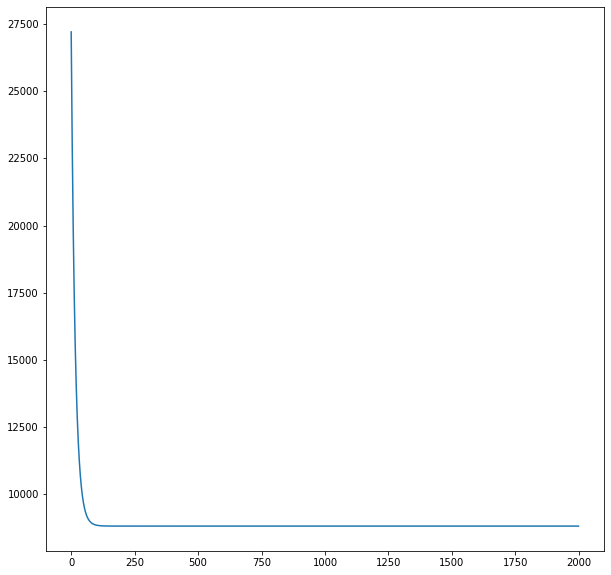

In [ ]:
X_label_2 = np.array(X_label_2)
Y_label_2 = np.array(Y_label_2)

param_update(X_label_2, Y_label_2)

plt.figure(figsize=(10, 10))
plt.plot(errors)

errors = []

# 2. Regression overfitting and Regularization
###### (1). 1.(2)에서와 같이 data set 10쌍을 생성하여, 아래식에 least square method를 적용하여 parameter를 구하시오. (실제 계산은 python을 이용)
    y = b0+b1X+b2X^2+b3X^3+b4X^4+b5X^5+b6X^6+b7X^7+b8X^8

  **Line 1-3:** 1.(2)에서 사용한 함수에 대해 Data set을 10쌍을 생성하여 저장하는 코드

  **Line 5:** 1.(2)에서 구한 X값에 대해서 X, X^2 값으로 변형하여 저장하기 위한 리스트 변수 선언

  **Line 7-16:** 1.(2)에서 구한 X값에 대해서 X, X^2, X^3, X^4, X^5, X^6, X^7, X^8 값으로 변형

  **Line 18-21:** 변형한 X값과 1.(2)에서 생성한 Y값에 대해 least square의 b0, b1, b2, b3, b4, b5, b6, b7, b8의 값을 행렬을 통해 구하기 위해 X 리스트를 (10x9) Y 리스트를 (10x1) 행렬로 변환한다. (편의를 위해 b0, b1, b2, b3, b4, b5, b6, b7, b8 변수 값을 x행렬이라 부르고, X 변수 값을 A행렬, Y 변수 값을 B행렬이라 한다.)
least square 방식은 임의의 b0, b1, b2, b3, b4, b5, b6, b7, b8 값에 대해 서로 다른 것이 k+1개가 있다면 |A^T A^|≠0 이므로 A^T A^ x^=A^T B^는 유일한 해 x = a0, a1, a2 값을 가진다. 따라서 A^T 값이 필요하므로

  **Line 23-25:** 따라서 A^T 값이 필요하므로 해당 값을 구해주고 A^T A^ x^=A^T B^의 행렬을 계산하기 위해서 행렬 곱 연산을 수행한다.

  **Line 27-28:** x 행렬을 구하기 위해서는 A^T A^행렬의 역 행렬을 구해 행렬 곱 연산을 수행하면 단위 행렬이 됨으로 각 양변에 〖〖(A〗^T A^ )〗^T를 행렬 곱 해준다.

  **Line 30-41:** 이전 단계에서 행렬 곱한 값 각 순서대로 b0, b1, b2, b3, b4, b5, b6, b7, b8 값이 됨으로 각각의 값을 그래프로 하는 함수를 선언한다.

  **Line 43-49:** least square 방식으로 만들어진 결과를 기존의 값과 비교하기 위해서 그래프를 그린다


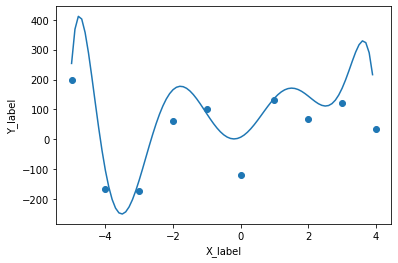

In [ ]:
Dis = np.random.normal(size=10) * mu
X_label_4 = list(range(-5,5,1))
Y_label_4 = list([function_num1(i) for i in X_label_4]) + Dis

r_X = []

for i in X_label_4:
  r_X.append(1)
  r_X.append(i)
  r_X.append(i**2) 
  r_X.append(i**3)
  r_X.append(i**4)
  r_X.append(i**5)
  r_X.append(i**6)
  r_X.append(i**7)
  r_X.append(i**8)

A_array = np.array(r_X)
A_array = A_array.reshape(10, 9)
B_array = np.array(Y_label_4)
B_array = B_array.reshape(10, 1)

A_array_T = A_array.T
AtAx = A_array_T.dot(A_array)
Atb = A_array_T.dot(B_array)

reAtAx = np.linalg.inv(AtAx)
x = reAtAx.dot(Atb)

b0 = x[0]
b1 = x[1]
b2 = x[2]
b3 = x[3]
b4 = x[4]
b5 = x[5]
b6 = x[6]
b7 = x[7]
b8 = x[8]
def function_num2(b0, b1,b2, b3, b4, b5, b6, b7, b8, x):
  result = a+b1*x+b2*x**2+b3*x**3+b4*x**4+b5*x**5+b6*x**6+b7*x**7+b8*x**8
  return result

X_label_5 = np.arange(-5, 4, 0.1)
Y_label_5 = list([function_num2(b0,b1,b2, b3, b4, b5, b6, b7, b8, i) for i in X_label_5])
plt.scatter(X_label_4, Y_label_4)
plt.plot(X_label_5, Y_label_5)
plt.xlabel('X_label')
plt.ylabel('Y_label')
plt.show()

###### (2). Ridge regression을 이용하여 regularization을 활용해서 overfitting이 일어나지 않도록 (1) 문제를 다시 푸시오 (ridge term의 hyperparameter를 작은 값에서 큰 값까지 다양하게 시도해볼 것)

  **Line 1:** Ridge regression 함수를 사용하기 위한 패키지 import

  **Line 3:** hyperparamter 변수와 차후에 그래프 그리는 위치 설정을 위한 dictionary 변수 생성

 ** Line 5-6:** Ridge 함수에서 사용하기 위해서 X, Y값의 형태를 변경해준다.

  **Line 8-11:** hyperparameter 별로 ridge 함수를 적용하여서 hyperparameter 값을 설정한 후, 이전 단계에서 변경한 X, Y 값을 넣어준다. 그 후 ridge regression 알고리즘을 동작해서 y값에 대한 예측 값을 계산한다.

  **Line 13-16:** 여러 hyperparameter 별로 그래프를 출력하기 위해서 2행 3열의 그림 배치를 구성하고 각각의 공간에 그래프를 배치한다. 점으로 실제 측정된 X, Y를 표시하고 실선으로 입력된 X와 예측된 Y값으로 그려준다.

  **Line 18:** 구성된 그래프를 출력한다.


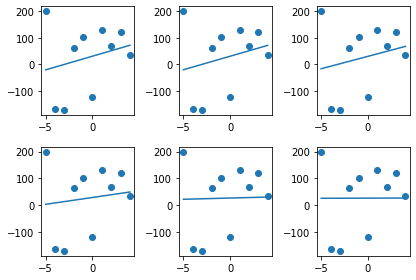

In [ ]:
from sklearn.linear_model import Ridge

hyperparameter = {0.001:231, 0.01:232, 0.1:233, 1:234, 10:235, 100:236}

X_label_4 = np.array(X_label_4).reshape((-1,1))
Y_label_4 = np.array(Y_label_4).reshape((-1,1))

for i in hyperparameter:
  ridge = Ridge(alpha=i, normalize=True)
  ridge.fit(X_label_4, Y_label_4)
  y_pred = ridge.predict(X_label_4)

  plt.subplot(hyperparameter[i])
  plt.tight_layout()
  plt.plot(X_label_4, y_pred)
  plt.scatter(X_label_4, Y_label_4)  

plt.show()

###### (3). (1)문제를 data set 10000쌍을 생성해서 푼다고 했을 때, 어떤 방법을 활용하는 것이 적절한지 고민하고 해결하시오 (Hint, least square method?, any update function?)

 ** Line 1:** error(cost)값의 변화를 저장하기 위한 리스트 변수

  **Line 3-28:** Gradient Descent 알고리즘을 작성한 함수 input으로 그래프의 X, Y 좌표를 받아오며, 받아온 X, Y 좌표를 찾고자 하는 parameter 식에 반영하여서 예측 값을 산출한다. 산출된 예측 값과 실제 값을 비교하여서 error(cost)를 저장한다. 산출된 error(cost)에 따라서 다음 번 학습을 위해 parameter를 update를 한다. parameter update 결과를 확인하기 위해 매 100번 마다 출력하도록 작성하였으며, 너무 낮은 수치의 error(cost)까지 가지 않도록 하기 위해 0.0001미만에서는 중지하도록 함수를 구현하였다.

 0 w1 = 1.00000, w2 = 1.00000, w3 = 1.00000, b = 1000.00000 error = 1014294.99719
100 w1 = 1.00000, w2 = 1.00000, w3 = 0.99997, b = 1000.00000 error = 456229.06246
200 w1 = 1.00000, w2 = 1.00000, w3 = 0.99997, b = 1000.00000 error = 456209.50077
300 w1 = 1.00000, w2 = 1.00000, w3 = 0.99997, b = 1000.00000 error = 456209.50008
400 w1 = 1.00000, w2 = 1.00000, w3 = 0.99997, b = 1000.00000 error = 456209.50007
500 w1 = 1.00000, w2 = 1.00000, w3 = 0.99997, b = 1000.00000 error = 456209.50007
600 w1 = 1.00000, w2 = 1.00000, w3 = 0.99997, b = 1000.00000 error = 456209.50006
700 w1 = 1.00000, w2 = 1.00000, w3 = 0.99997, b = 1000.00000 error = 456209.50005
800 w1 = 1.00000, w2 = 1.00000, w3 = 0.99997, b = 1000.00000 error = 456209.50005
900 w1 = 1.00000, w2 = 1.00000, w3 = 0.99997, b = 1000.00000 error = 456209.50004
1000 w1 = 1.00000, w2 = 1.00000, w3 = 0.99997, b = 1000.00000 error = 456209.50003
1100 w1 = 1.00000, w2 = 1.00000, w3 = 0.99997, b = 1000.00000 error = 456209.50003
1200 w1 = 1.00

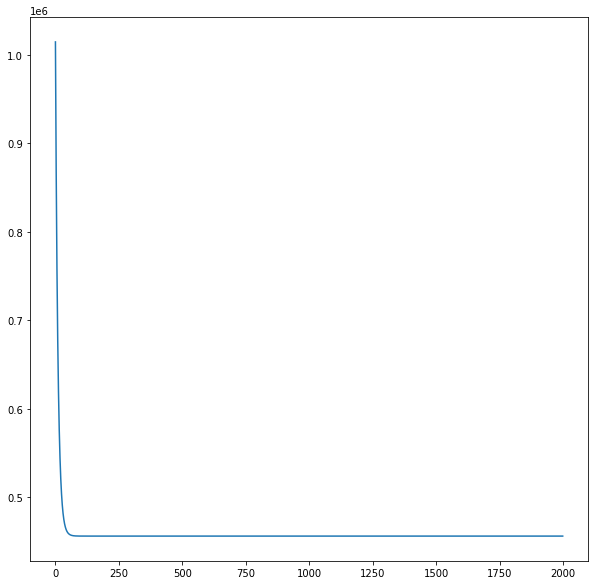

In [ ]:
errors = []

def param_update(x, y):
  iteration = 2000
  learning_rate = 0.0000000000000001
  w1 = 1.0
  w2 = 1.0
  w3 = 1.0
  b = 1000.0  

  for i in range(iteration):    
    y_pred = w1 * 4 + w2 * 5*x + w3 * 2*x**2 + b

    error = ((y_pred - y)**2).mean()
    if error < 0.0001:
      break

    errors.append(error)
    
    w1 = w1 - learning_rate * ((y_pred - y) * 4).mean()
    w2 = w2 - learning_rate * ((y_pred - y) * 5*x).mean()
    w3 = w3 - learning_rate * ((y_pred - y) * 2*x**2).mean()

    b = b - learning_rate * (y_pred - y).mean()

    if i % 100 == 0:
      print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, w3 = {3:.5f}, b = {4:.5f} error = {5:.5f}".format(i, w1, w2, w3, b, error)) 

Dis = np.random.normal(size=10000) * mu
X_label_6 = list(range(-5000,5000,1))
Y_label_6 = list([function_num1(i) for i in X_label_6]) + Dis

X_label_6 = np.array(X_label_6)
Y_label_6 = np.array(Y_label_6)

param_update(X_label_6, Y_label_6)

plt.figure(figsize=(10, 10))
plt.plot(errors)